# Data Processing in Python project

### Authors: Edgar Robles Diaz, Mirko Forgetta

The purpose of the following project is to get some information from the web site https://uptownspirits.com/. It is an online shop selling alcohol items.

The Notebook is arranged as following:

  * Scraping (of the web-page);
  * Cleaning (of the dataset);
  * Information and plots (from the dataset).

## Scraping 

First it will import the required libraries in order to scrape the data succesfully.

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup, SoupStrainer
from urllib.request import urlopen, Request
import json

Through the next command, we can see that the connection to the website was succesful and allows for scraping.

In [2]:
print(requests.get("https://www.uptownspirits.com/robots.txt").text)

User-agent: *
Disallow: /wp-admin/
Allow: /wp-admin/admin-ajax.php



Firstly, we need the complete set of links in an object for further parsing.

In [10]:
def GetSoup(link):
        r = requests.get(link)
        r.encoding = 'UTF-8'
        return BeautifulSoup(r.text,'lxml')

In [ ]:
def GetLinks(link):                     
    soup = GetSoup(link)
    l = []
    for link in soup.findAll('a', attrs={"class":"product-images"}):
        l.append(link.get('href'))
    return l

In [11]:
linqs = []

for i in range(1,9):
    linqs.append("https://uptownspirits.com/shop/liquor/page/" + str(i) + "/?product_count=144")

In [14]:
products =[]

for link in linqs:
    products.append(GetLinks(link))

prods = [item for sublist in products for item in sublist]

Afterwards, we must build a function that allows us to convert an html from the website to a BeautifulSoup object (BSO).

In [15]:
class Scraper:
    
    def __init__(self):
        self.dataall = {}
        
    def GetSoup(self, url):
        r = requests.get(url)
        r.encoding = 'UTF-8'
        self.soup  = BeautifulSoup(r.text,'lxml')
        
    def ParseSKU(self):
        el = self.soup.find('span', attrs={'class':'sku'})
        self.SKU = el.text if el else "NA"
    
    def ParseName(self):
        self.title = self.soup.find('h1', attrs={'class':'product_title entry-title'}).text

    def ParsePrice(self):
        el = self.soup.find('p', attrs={'class':'price'})
        self.price = el.text if len(el.text) >= 8 else el.text + " " + el.text
    
    def ParseBrand(self):
        el = self.soup.find('tr', attrs={'class':'woocommerce-product-attributes-item woocommerce-product-attributes-item--attribute_pa_brand'})
        ele = el.text if el else "NA"
        self.brand = ele.replace("Brand","")
    
    def ParseAvailability(self):
        el = self.soup.find('div', attrs={'class':'avada-availability'})
        self.availability = el.text if el else "NA"
         
    def Region(self):
        el = self.soup.find('tr', attrs={'class':'woocommerce-product-attributes-item woocommerce-product-attributes-item--attribute_pa_region'})
        ele = el.text if el else "NA"
        self.region = ele.replace("Region","")
    
    def ParseWeight(self):
        el = self.soup.find('tr', attrs={'class':'woocommerce-product-attributes-item woocommerce-product-attributes-item--weight'})
        ele = el.text if el else "NA"
        self.weight = ele.replace('Weight', '')
        
    def ParseAlcType(self):
        el = self.soup.find('tr', attrs={'class':'woocommerce-product-attributes-item woocommerce-product-attributes-item--attribute_pa_alcohol-type'})
        ele = el.text if el else "NA"
        self.alctype = ele.replace('Alcohol Type', "")
    
    def Clas(self):
        el = self.soup.find('tr', attrs={'class':"woocommerce-product-attributes-item woocommerce-product-attributes-item--attribute_pa_class"})
        ele = el.text if el else "NA"
        self.clas = ele.replace("Class","")
    
    def Proof(self):
        el = self.soup.find('tr', attrs={'class':'woocommerce-product-attributes-item woocommerce-product-attributes-item--attribute_pa_proof'})
        ele = el.text if el else "NA"
        self.proof = ele.replace('Proof','')
        
    def oneDic(self):
        '''
        a dictionary of data for one link
        '''
        self.dic = {}
        
        self.dic['SKU'] = self.SKU
        self.dic['Name'] = self.title
        self.dic['Price'] = self.price
        self.dic['Brand'] = self.brand
        self.dic['Availability'] = self.availability
        self.dic['Region'] = self.region
        self.dic['Weight'] = self.weight
        self.dic['Type'] = self.alctype
        self.dic['Class'] = self.clas
        self.dic['Proof'] = self.proof
        
        #append it to all dataframe
        self.dataall[self.title] = self.dic

In [16]:
ws = Scraper()

Next step will need some minutes...

In [17]:
for link in prods:
    ws.GetSoup(link)
    ws.ParseSKU()
    ws.ParseName()
    ws.ParsePrice()
    ws.ParseBrand()
    ws.ParseAvailability()
    ws.Region()
    ws.ParseWeight()
    ws.ParseAlcType()
    ws.Clas()
    ws.Proof()
    ws.oneDic()

In [301]:
df = pd.DataFrame.from_dict(ws.dataall).transpose()
df

,Availability,Brand,Class,Name,Price,Proof,Region,SKU,Type,Weight
Skrewball Peanut Butter Whiskey 750ml,In stock,Skrewball,Peanut Butter Whiskey,Skrewball Peanut Butter Whiskey 750ml,$24.95 $24.95,70,America,860265002405,Whiskey,3.5 lbs
E.H. Taylor Small Batch Bourbon Whiskey 750ml,Out of stock,E.H. Taylor,Bourbon Whiskey,E.H. Taylor Small Batch Bourbon Whiskey 750ml,$49.95 $43.95,100,America,088004005498,Whiskey,3.5 lbs
Eagle Rare Bourbon Whiskey 750ml,In stock,"Buffalo Trace, Eagle Rare",Bourbon Whiskey,Eagle Rare Bourbon Whiskey 750ml,$33.95 $33.95,100,America,088004021344,Whiskey,3.5 lbs
Pennsylvania Dutch Egg Nog 750ml,Out of stock,Pennsylvania Dutch,NA,Pennsylvania Dutch Egg Nog 750ml,$9.95 $9.95,29.5,NA,084380360947,Liqueur,3.5 lbs
Buffalo Trace Bourbon Whiskey 750ml,In stock,Buffalo Trace,NA,Buffalo Trace Bourbon Whiskey 750ml,$24.95 $24.95,NA,NA,080244009236,Whiskey,3.5 lbs
Willett Family Estate Bottled 4 Year Rye 750ml,Out of stock,Willett,American Whiskey,Willett Family Estate Bottled 4 Year Rye 750ml,$59.95 $59.95,106.2,America,NA,Rye,3.5 lbs
Empress 1908 Gin 750ml,In stock,Empress 1908,NA,Empress 1908 Gin 750ml,$29.95 $26.95,85,Canada,628451773108,Gin,3.5 lbs
Blanton’s Single Barrel Bourbon 750ml,Out of stock,NA,NA,Blanton’s Single Barrel Bourbon 750ml,$139.95 $139.95,NA,America,NA,NA,3.5 lbs
Sazerac Rye Whiskey 750ml,In stock,Sazerac,Rye Whiskey,Sazerac Rye Whiskey 750ml,$27.95 $27.95,90,America,088004139940,Whiskey,3.5 lbs
Tequila Clase Azul Reposado 750ml,In stock,Clase Azul,Reposado,Tequila Clase Azul Reposado 750ml,$84.95 $84.95,80,Mexico,081240049516,Tequila,7 lbs


## Cleaning 
In the data frame, there some issues to fix. For example in the Price's coloumn there are two numbers. This variable and the Weight's one, by the way, are quite useless. We will transform them as "float". Later, two more variables will be made ("Price_diff" and "Worth"). In the end, we will delete useless variables and items with any "Na".

Splitting prices into two columns (previous and discount).

In [302]:
new = df['Price'].str.split(" ", n = 1, expand = True)
df['Previous_price'] = new[0]
df['Discount_price'] = new[1]
df.drop(columns = ['Price'], inplace = True)

Transform prices into float, create diff column to look at the difference between previous and discounted prices.

In [303]:
df['Previous_price'] = df['Previous_price'].str.replace(',', '')
df['Previous_price'] = df['Previous_price'].str.replace('$', '')
df['Previous_price'] = df['Previous_price'].astype(float)

In [304]:
df['Discount_price'] = df['Discount_price'].str.replace(',', '')
df['Discount_price'] = df['Discount_price'].str.replace('$', '')
df['Discount_price'] = df['Discount_price'].astype(float)

In [306]:
df['Price_diff'] = df['Previous_price'] - df['Discount_price']

Transform Weight into float.

In [307]:
s1=df['Weight'].str.replace(' lbs', '')
s2=s1.str.replace('NA','999999')
df['Size']=s2.astype(float)
df.drop(columns = ['Weight'], inplace = True)

In [308]:
df['Worth'] = df['Discount_price'] / df['Size']
df

,Availability,Brand,Class,Name,Proof,Region,SKU,Type,Previous_price,Discount_price,Price_diff,Size,Worth
Skrewball Peanut Butter Whiskey 750ml,In stock,Skrewball,Peanut Butter Whiskey,Skrewball Peanut Butter Whiskey 750ml,70,America,860265002405,Whiskey,24.95,24.95,0.00,3.5,7.128571
E.H. Taylor Small Batch Bourbon Whiskey 750ml,Out of stock,E.H. Taylor,Bourbon Whiskey,E.H. Taylor Small Batch Bourbon Whiskey 750ml,100,America,088004005498,Whiskey,49.95,43.95,6.00,3.5,12.557143
Eagle Rare Bourbon Whiskey 750ml,In stock,"Buffalo Trace, Eagle Rare",Bourbon Whiskey,Eagle Rare Bourbon Whiskey 750ml,100,America,088004021344,Whiskey,33.95,33.95,0.00,3.5,9.700000
Pennsylvania Dutch Egg Nog 750ml,Out of stock,Pennsylvania Dutch,NA,Pennsylvania Dutch Egg Nog 750ml,29.5,NA,084380360947,Liqueur,9.95,9.95,0.00,3.5,2.842857
Buffalo Trace Bourbon Whiskey 750ml,In stock,Buffalo Trace,NA,Buffalo Trace Bourbon Whiskey 750ml,NA,NA,080244009236,Whiskey,24.95,24.95,0.00,3.5,7.128571
Willett Family Estate Bottled 4 Year Rye 750ml,Out of stock,Willett,American Whiskey,Willett Family Estate Bottled 4 Year Rye 750ml,106.2,America,NA,Rye,59.95,59.95,0.00,3.5,17.128571
Empress 1908 Gin 750ml,In stock,Empress 1908,NA,Empress 1908 Gin 750ml,85,Canada,628451773108,Gin,29.95,26.95,3.00,3.5,7.700000
Blanton’s Single Barrel Bourbon 750ml,Out of stock,NA,NA,Blanton’s Single Barrel Bourbon 750ml,NA,America,NA,NA,139.95,139.95,0.00,3.5,39.985714
Sazerac Rye Whiskey 750ml,In stock,Sazerac,Rye Whiskey,Sazerac Rye Whiskey 750ml,90,America,088004139940,Whiskey,27.95,27.95,0.00,3.5,7.985714
Tequila Clase Azul Reposado 750ml,In stock,Clase Azul,Reposado,Tequila Clase Azul Reposado 750ml,80,Mexico,081240049516,Tequila,84.95,84.95,0.00,7.0,12.135714


Delete irrelevant variables, SKU (although useful for ID, has a lot of NA values) and Class (only useful for Whisky, might use later).

In [309]:
del df['SKU']
del df['Class']

Drop NA values (observations lacking infromation such as Brand, Proof, Type and Region).

In [320]:
clean_df = df.dropna(axis=0, how='any')
clean_df

,Availability,Brand,Name,Proof,Region,Type,Previous_price,Discount_price,Price_diff,Size,Worth
Skrewball Peanut Butter Whiskey 750ml,In stock,Skrewball,Skrewball Peanut Butter Whiskey 750ml,70,America,Whiskey,24.95,24.95,0.00,3.5,7.128571
E.H. Taylor Small Batch Bourbon Whiskey 750ml,Out of stock,E.H. Taylor,E.H. Taylor Small Batch Bourbon Whiskey 750ml,100,America,Whiskey,49.95,43.95,6.00,3.5,12.557143
Eagle Rare Bourbon Whiskey 750ml,In stock,"Buffalo Trace, Eagle Rare",Eagle Rare Bourbon Whiskey 750ml,100,America,Whiskey,33.95,33.95,0.00,3.5,9.700000
Pennsylvania Dutch Egg Nog 750ml,Out of stock,Pennsylvania Dutch,Pennsylvania Dutch Egg Nog 750ml,29.5,NA,Liqueur,9.95,9.95,0.00,3.5,2.842857
Buffalo Trace Bourbon Whiskey 750ml,In stock,Buffalo Trace,Buffalo Trace Bourbon Whiskey 750ml,NA,NA,Whiskey,24.95,24.95,0.00,3.5,7.128571
Willett Family Estate Bottled 4 Year Rye 750ml,Out of stock,Willett,Willett Family Estate Bottled 4 Year Rye 750ml,106.2,America,Rye,59.95,59.95,0.00,3.5,17.128571
Empress 1908 Gin 750ml,In stock,Empress 1908,Empress 1908 Gin 750ml,85,Canada,Gin,29.95,26.95,3.00,3.5,7.700000
Blanton’s Single Barrel Bourbon 750ml,Out of stock,NA,Blanton’s Single Barrel Bourbon 750ml,NA,America,NA,139.95,139.95,0.00,3.5,39.985714
Sazerac Rye Whiskey 750ml,In stock,Sazerac,Sazerac Rye Whiskey 750ml,90,America,Whiskey,27.95,27.95,0.00,3.5,7.985714
Tequila Clase Azul Reposado 750ml,In stock,Clase Azul,Tequila Clase Azul Reposado 750ml,80,Mexico,Tequila,84.95,84.95,0.00,7.0,12.135714


## Information and plots

Group data to every region's type of liquor 

In [311]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

In [337]:
COUNT=clean_df.Type.value_counts(dropna=False)
df1=pd.DataFrame(COUNT)

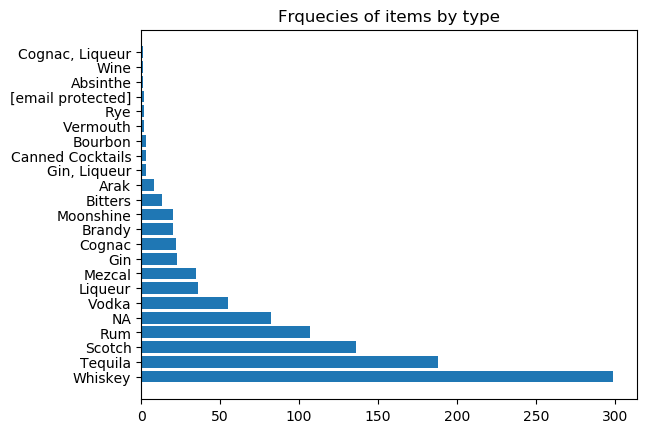

In [338]:
plt.rcdefaults()
fig, ax = plt.subplots()

x = np.arange(len(df1))
ax.set_yticks(x)
ax.set_yticklabels(df1.index)
ax.barh(x,COUNT)
ax.set_title('Frquecies of items by type')

plt.show()

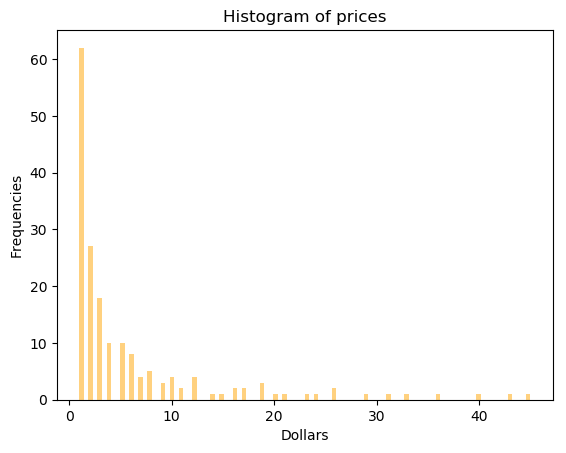

In [345]:
df2=clean_df.Discount_price.value_counts(dropna=False)
num_bins = 100
n, bins, patches = plt.hist(df2, num_bins, facecolor='orange', alpha=0.5)
plt.xlabel('Dollars')
plt.ylabel('Frequencies')
plt.title('Histogram of prices')
plt.show()

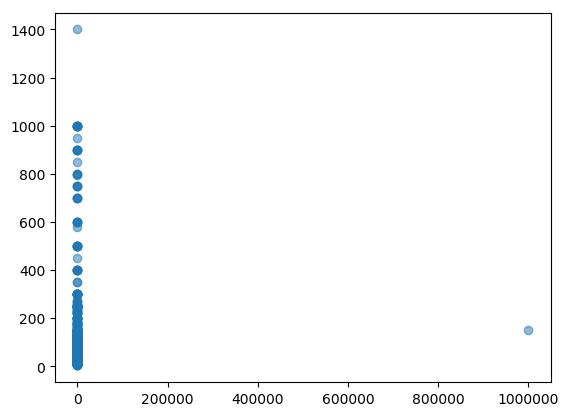

In [348]:
plt.scatter(clean_df.Size, clean_df.Discount_price,  alpha=0.5)
plt.show()